# Store Product Quantity Prediction

In [1130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [1131]:
df_warehaouse=pd.read_csv("Historical Product Demand.csv")
df_warehaouse.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [1132]:
df_warehaouse.Warehouse.value_counts()

Warehouse
Whse_J    764447
Whse_A    153574
Whse_S     88200
Whse_C     42354
Name: count, dtype: int64

In [1133]:
df_warehaouse.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [1134]:
df_warehaouse[df_warehaouse["Warehouse"]=="Whse_J"].Product_Code.value_counts()

Product_Code
Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_1286     8888
Product_1382     8619
                ...  
Product_0244        7
Product_0233        5
Product_0234        4
Product_0553        1
Product_0853        1
Name: count, Length: 1625, dtype: int64

In [1135]:
# Here we select one warehouse

In [1136]:
df_whse_j=df_warehaouse[df_warehaouse["Warehouse"]=="Whse_J"]

In [1137]:
# Here we select one product of that warehouse to make a model or make dataset to behave like a store dataset.

In [1138]:
df_store_Product_1359=df_whse_j[df_whse_j["Product_Code"]=="Product_1359"]
df_store_Product_1359.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
276,Product_1359,Whse_J,Category_019,2012/4/18,80000
282,Product_1359,Whse_J,Category_019,2012/5/21,70000
289,Product_1359,Whse_J,Category_019,2012/6/26,80000
292,Product_1359,Whse_J,Category_019,2012/7/17,100000
296,Product_1359,Whse_J,Category_019,2012/8/24,100000


In [1139]:
df_store_Product_1359.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16936 entries, 276 to 1046518
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_Code      16936 non-null  object
 1   Warehouse         16936 non-null  object
 2   Product_Category  16936 non-null  object
 3   Date              16936 non-null  object
 4   Order_Demand      16936 non-null  object
dtypes: object(5)
memory usage: 793.9+ KB


In [1140]:
# make date columns type as datetime

In [1141]:
df_store_Product_1359["Date"]=pd.to_datetime(df_store_Product_1359["Date"])

In [1142]:
df_store_Product_1359.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16936 entries, 276 to 1046518
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_Code      16936 non-null  object        
 1   Warehouse         16936 non-null  object        
 2   Product_Category  16936 non-null  object        
 3   Date              16936 non-null  datetime64[ns]
 4   Order_Demand      16936 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 793.9+ KB


In [1143]:
df_store_Product_1359

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
276,Product_1359,Whse_J,Category_019,2012-04-18,80000
282,Product_1359,Whse_J,Category_019,2012-05-21,70000
289,Product_1359,Whse_J,Category_019,2012-06-26,80000
292,Product_1359,Whse_J,Category_019,2012-07-17,100000
296,Product_1359,Whse_J,Category_019,2012-08-24,100000
...,...,...,...,...,...
1046514,Product_1359,Whse_J,Category_019,2016-10-03,20000
1046515,Product_1359,Whse_J,Category_019,2016-09-16,10000
1046516,Product_1359,Whse_J,Category_019,2016-11-01,30000
1046517,Product_1359,Whse_J,Category_019,2016-12-01,20000


In [1144]:
df=df_store_Product_1359.sort_values(by="Date")

In [1145]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
59646,Product_1359,Whse_J,Category_019,2012-01-05,1000
63099,Product_1359,Whse_J,Category_019,2012-01-05,5000
2577,Product_1359,Whse_J,Category_019,2012-01-05,2000
32610,Product_1359,Whse_J,Category_019,2012-01-05,10000
46739,Product_1359,Whse_J,Category_019,2012-01-05,5000


In [1146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16936 entries, 59646 to 921328
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_Code      16936 non-null  object        
 1   Warehouse         16936 non-null  object        
 2   Product_Category  16936 non-null  object        
 3   Date              16936 non-null  datetime64[ns]
 4   Order_Demand      16936 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 793.9+ KB


In [1147]:
# convert Order_Demand to integer

In [1148]:
df["Order_Demand"]=df["Order_Demand"].str.replace("(","").str.replace(")","").astype("int")

In [1149]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
59646,Product_1359,Whse_J,Category_019,2012-01-05,1000
63099,Product_1359,Whse_J,Category_019,2012-01-05,5000
2577,Product_1359,Whse_J,Category_019,2012-01-05,2000
32610,Product_1359,Whse_J,Category_019,2012-01-05,10000
46739,Product_1359,Whse_J,Category_019,2012-01-05,5000


In [1150]:
df.set_index("Date",inplace=True)

In [1151]:
df.tail()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2016-12-28,Product_1359,Whse_J,Category_019,3000
2016-12-28,Product_1359,Whse_J,Category_019,13000
2016-12-28,Product_1359,Whse_J,Category_019,50000
2016-12-28,Product_1359,Whse_J,Category_019,3000
2017-01-06,Product_1359,Whse_J,Category_019,100000


In [1152]:
df.drop(["Product_Code","Warehouse","Product_Category"],axis=1,inplace=True)

In [1153]:
df.head()

,Order_Demand
Date,
2012-01-05,1000
2012-01-05,5000
2012-01-05,2000
2012-01-05,10000
2012-01-05,5000


In [1154]:
df.drop("2017-01-06",axis=0,inplace=True)

In [1155]:
df.tail()

,Order_Demand
Date,
2016-12-28,50000
2016-12-28,3000
2016-12-28,13000
2016-12-28,50000
2016-12-28,3000


# Model Implementation

In [1177]:
df_month=df.resample(rule="MS").sum()

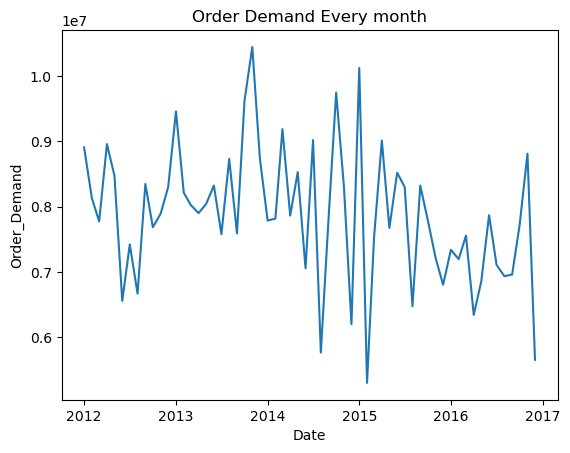

In [1178]:
sns.lineplot(data=df_month,x=df_month.index,y="Order_Demand")
plt.title("Order Demand Every month")
plt.show()

In [1179]:
# 1. check data is stationary or not

In [1180]:
def test_stationary(df,var):
    df["roll_mean"]=df[var].rolling(window=12,min_periods=1).mean()
    df["rolling_std"]=df[var].rolling(window=12,min_periods=1).std()
    
    from statsmodels.tsa.stattools import adfuller
    adf_stats=adfuller(df[var])
    stats=pd.Series(adf_stats[0:4],index=['Test Statistic',"p-value","#lags used","number of observations used"])
    print(stats)
    
    for key,values in adf_stats[4].items():
        print("criticality",key,":",values)
        
    #sns.lineplot(data=df,x=df.index,y=df.var)
    sns.lineplot(data=df,x=df.index,y=var)
    sns.lineplot(x=df.index,y=df["roll_mean"])
    sns.lineplot(x=df.index,y=df.rolling_std)
    plt.show()
    

Test Statistic                -7.743620e+00
p-value                        1.045985e-11
#lags used                     0.000000e+00
number of observations used    5.900000e+01
dtype: float64
criticality 1% : -3.5463945337644063
criticality 5% : -2.911939409384601
criticality 10% : -2.5936515282964665


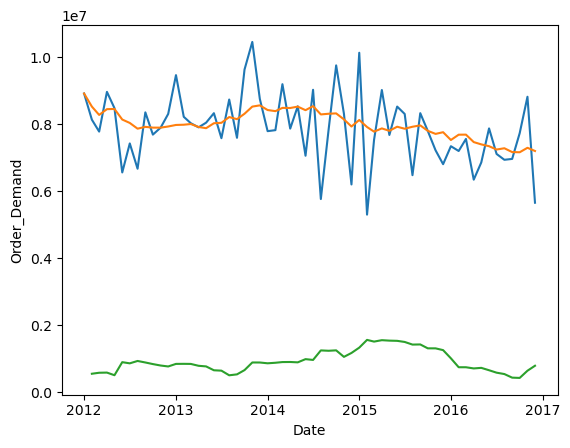

In [1181]:
test_stationary(df_month,"Order_Demand")

In [1182]:
df_month["shift1"]=df_month["Order_Demand"].shift(1)
df_month["shift_differnce"]=df_month["Order_Demand"]-df_month["shift1"]

# Dataset is stationary 

In [1183]:
# Finding p,d,q value

In [1184]:
df_month.head()

,Order_Demand,roll_mean,rolling_std,shift1,shift_differnce
Date,,,,,
2012-01-01,8911000,8.911000e+06,NaN,NaN,NaN
2012-02-01,8131000,8.521000e+06,551543.289326,8911000.0,-780000.0
2012-03-01,7775000,8.272333e+06,581038.151358,8131000.0,-356000.0
2012-04-01,8960000,8.444250e+06,585910.900507,7775000.0,1185000.0
2012-05-01,8475000,8.450400e+06,507600.039401,8960000.0,-485000.0


In [1185]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

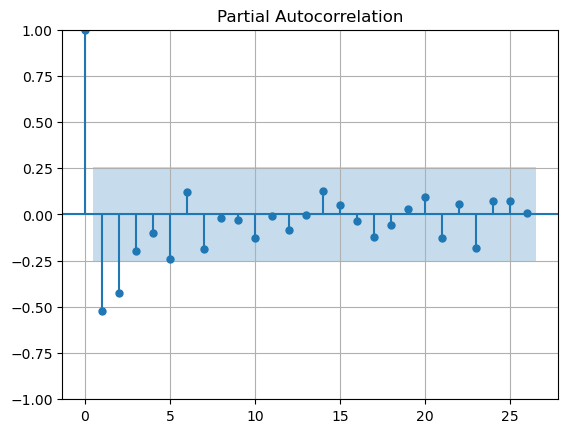

In [1186]:
plot_pacf(df_month["shift_differnce"].dropna(),lags=26)
plt.grid()

In [1187]:
# by pacf plot we get value of p

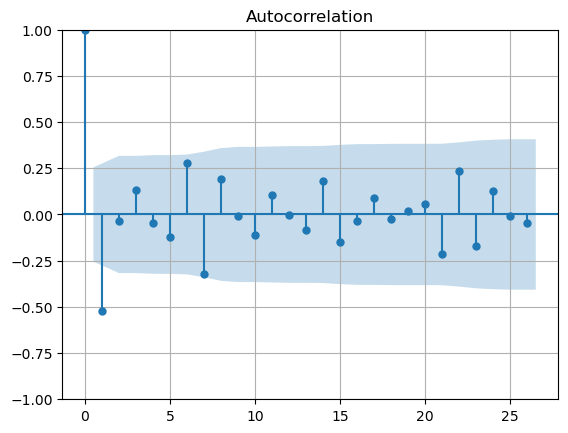

In [1188]:
plot_acf(df_month["shift_differnce"].dropna(),lags=26)
plt.grid()

In [251]:
# By acf_plot we get value of q

In [1189]:
from statsmodels.tsa.arima.model import ARIMA

In [1190]:
airP=df_month.copy()

In [1192]:
# divide the dataset in two part train and test
train=airP[:round(len(airP)*70/100)]
test=airP[round(len(airP)*70/100):]

In [1196]:
# First we try with arima model

In [1238]:
arimax_model=ARIMA(train["Order_Demand"],order=(2,1,6))

In [1239]:
arimax_model_fit=arimax_model.fit()

In [1240]:
prediction=arimax_model_fit.predict(start="2015-07-01",end="2016-12-01")

In [1241]:
airP["pred"]=prediction

In [1242]:
airP.tail()

,Order_Demand,roll_mean,rolling_std,shift1,shift_differnce,pred
Date,,,,,,
2016-08-01,6934000,7.278000e+06,542310.545050,7108000.0,-174000.0,7.879575e+06
2016-09-01,6960000,7.164250e+06,435342.524498,6934000.0,26000.0,7.875123e+06
2016-10-01,7727000,7.158667e+06,426879.019126,6960000.0,767000.0,7.878477e+06
2016-11-01,8814000,7.291833e+06,641626.035707,7727000.0,1087000.0,7.876462e+06
2016-12-01,5653000,7.196000e+06,790001.841195,8814000.0,-3161000.0,7.877896e+06


<Axes: xlabel='Date', ylabel='Order_Demand'>

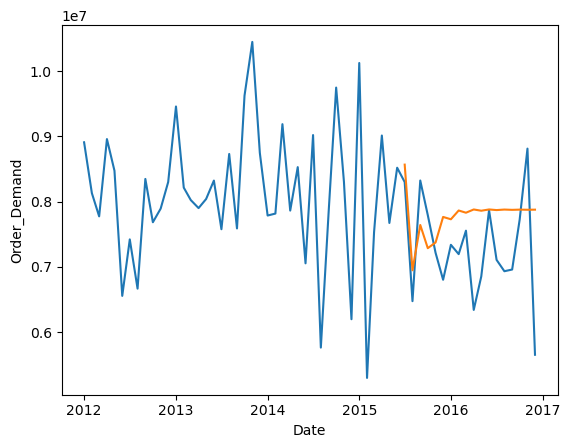

In [1243]:
sns.lineplot(data=airP,x=airP.index,y="Order_Demand")
sns.lineplot(data=airP,x=airP.index,y="pred")

In [1244]:
from sklearn.metrics import mean_squared_error

In [1245]:
np.sqrt(mean_squared_error(test["Order_Demand"],prediction))

888226.9503627367

In [1223]:
# Now we try Sarimax model

In [1224]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1232]:
model=SARIMAX(train["Order_Demand"],order=(2,1,6),seasonal_order=(2,0,6,42))

In [1233]:
model_fit=model.fit()

In [1234]:
prediction=model_fit.predict(start="2015-07-01",end="2016-12-01")

In [1235]:
airP["pred"]=prediction

<Axes: xlabel='Date', ylabel='Order_Demand'>

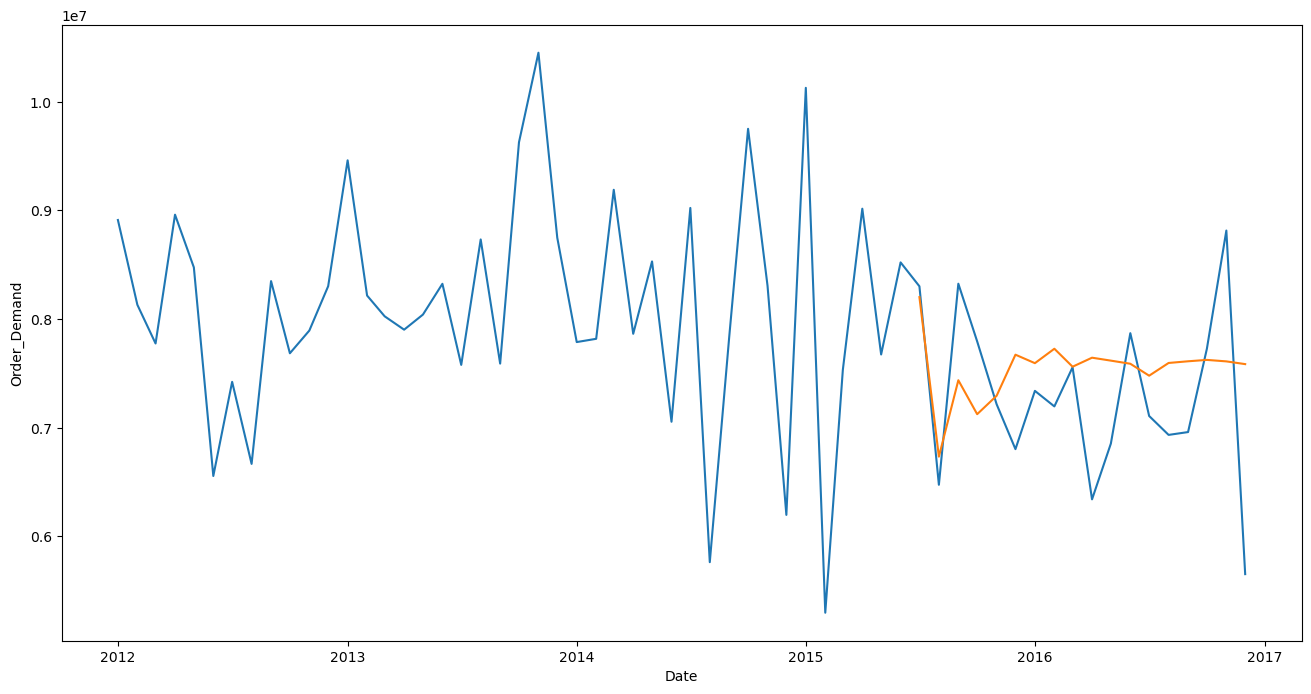

In [1236]:
plt.figure(figsize=(16,8))
sns.lineplot(data=airP,x=airP.index,y="Order_Demand")
sns.lineplot(data=airP,x=airP.index,y="pred")

In [1237]:
np.sqrt(mean_squared_error(test["Order_Demand"],prediction))

780799.8474759283

In [1079]:
prediction

2015-07-01    8.849102e+06
2015-08-01    7.594248e+06
2015-09-01    8.254959e+06
2015-10-01    8.044904e+06
2015-11-01    8.087742e+06
2015-12-01    8.226253e+06
2016-01-01    7.909844e+06
2016-02-01    8.155942e+06
2016-03-01    8.092837e+06
2016-04-01    8.067425e+06
2016-05-01    8.095698e+06
2016-06-01    7.837702e+06
2016-07-01    8.038452e+06
2016-08-01    7.758148e+06
2016-09-01    8.027433e+06
2016-10-01    8.113509e+06
2016-11-01    7.992906e+06
2016-12-01    7.875621e+06
Freq: MS, Name: predicted_mean, dtype: float64

# <b> <font color="red">  Note:- </font> </b>we see our SARIMAX model work quiet good then ARIMA so we use SARIMAX for prediction

In [1248]:
import pickle

In [1252]:
with open("model_pickle.pkl","wb") as f:
    pickle.dump(model_fit,f)

In [1253]:
with open("model_pickle.pkl","rb") as f:
    mp=pickle.load(f)

In [1251]:
mp.predict(start="2015-07-01",end="2015-09-01")

2015-07-01    8.201441e+06
2015-08-01    6.733657e+06
2015-09-01    7.436862e+06
Freq: MS, Name: predicted_mean, dtype: float64